In [1]:
# 자연어처리
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
# 데이터 분석
import pandas as pd
import numpy as np

In [4]:
# 시각화
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [5]:
# 정규표현식
import re

In [6]:
# 시간이 오래 걸리는 작업시 시각적으로 진행상황 수치로( %) 보여준다.
from tqdm import tqdm
tqdm.pandas()

In [6]:
# 정규표현식
# # 숫자 제거 [0-9], \d, [^0-9], \D
# df['title2'] = df['title'].str.replace(r'\d','',regex=True)
# # 문자만 남기기 [^ㄱ-ㅎㅏ-ㅣ가-힣a-zA-Z]
# df['title3'] = df['title'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣a-zA-Z]',' ',regex=True)
# #df['title'].str.replace('[0-9]', '', regex=True)
# df['title4'] = df['title'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]',' ',regex=True)

In [7]:
# 한글만 추출 + 2개이상 공백 1개로 변환
def extract_korean(text):
    # 한글만 추출
    text = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣\s]','',text)
    # 공백 2개 이상인경우 1개로 변환
    text = re.sub(r'\s+',' ',text)
    return text

In [8]:
# 형태소분석
from pecab import PeCab
pecab = PeCab()

* 품사태그표 :
    * https://konlpy.org/ko/v0.6.0/morph/
    * https://docs.google.com/spreadsheets/d/1OGAjUvalBuX-oZvZ_-9tEfYD2gQe7hTGsgUpiiBSXI8/edit#gid=0

In [9]:
corpus_text = '중국집에서 짜장면을 시켰어요'
pecab_pos = pecab.pos(corpus_text)
pecab_pos

[('중국', 'NNP'),
 ('집', 'NNG'),
 ('에서', 'JKB'),
 ('짜장면', 'NNG'),
 ('을', 'JKO'),
 ('시켰', 'VV+EP'),
 ('어요', 'EF')]

In [10]:
# 명사만 추출
pecab.nouns(corpus_text)

['중국', '집', '짜장면']

In [11]:
join_text = []
for text,pos in pecab_pos:
    if not pos.startswith('J'):
#         print(text,pos)
        join_text.append(text)
" ".join(join_text)    

'중국 집 짜장면 시켰 어요'

In [12]:
# 명사,동사,형용사 추출하기
def get_nouns_verbs_adjectives(text):
    pecab = PeCab()
    pecab_pos = pecab.pos(text)
    join_text = []
    for text,pos in pecab_pos:
        if pos.startswith('N') or pos == 'VV' or pos == 'VA':
            join_text.append(text)
    return " ".join(join_text)     

In [13]:
url = 'https://raw.githubusercontent.com/KLUE-benchmark/KLUE/main/klue_benchmark/ynat-v1.1/ynat-v1.1_train.json'
print(url)
df = pd.read_json(url)
df.shape

https://raw.githubusercontent.com/KLUE-benchmark/KLUE/main/klue_benchmark/ynat-v1.1/ynat-v1.1_train.json


(45678, 7)

In [14]:
df.head(2)

,guid,title,predefined_news_category,label,annotations,url,date
0,ynat-v1_train_00000,유튜브 내달 2일까지 크리에이터 지원 공간 운영,IT과학,생활문화,"{'annotators': ['08', '13', '07'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2016.06.30. 오전 10:36
1,ynat-v1_train_00001,어버이날 맑다가 흐려져…남부지방 옅은 황사,생활문화,생활문화,"{'annotators': ['14', '13', '07'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2016.05.08. 오전 5:25


In [15]:
df = df[['title','label']]
df.head(2)

,title,label
0,유튜브 내달 2일까지 크리에이터 지원 공간 운영,생활문화
1,어버이날 맑다가 흐려져…남부지방 옅은 황사,생활문화


In [20]:
# df['title'].head(2).map(lambda title: extract_korean(title)).map(lambda title: get_nouns_verbs_adjectives(title))
# df['title2'] = df['title'].map(extract_korean).map(get_nouns_verbs_adjectives)
df['title2'] = df['title'].progress_map(extract_korean).progress_map(get_nouns_verbs_adjectives)

100%|████████████████████████████████████████████████████████████████████████████| 45678/45678 [10:43<00:00, 71.01it/s]


In [21]:
df.head(2)

,title,label,title2
0,유튜브 내달 2일까지 크리에이터 지원 공간 운영,생활문화,유튜브 내달 일 크리에이터 지원 공간 운영
1,어버이날 맑다가 흐려져…남부지방 옅은 황사,생활문화,어버이날 맑 남부 지방 옅 황사


In [22]:
df.to_csv('정제_형태소.csv',index=False)

In [7]:
df = pd.read_csv('정제_형태소.csv')
df.head(2)

,title,label,title2
0,유튜브 내달 2일까지 크리에이터 지원 공간 운영,생활문화,유튜브 내달 일 크리에이터 지원 공간 운영
1,어버이날 맑다가 흐려져…남부지방 옅은 황사,생활문화,어버이날 맑 남부 지방 옅 황사


In [8]:
df[df['title2'].isnull()]

,title,label,title2
4013,LG스럽지가 않네…달라진 G6 써보니,IT과학,NaN
24451,YonseiKT 5G OPEN 2018,IT과학,NaN
25303,LG K10도 있어요,IT과학,NaN
30814,LG V30S 씽큐,IT과학,NaN
36620,WatchPlay란,IT과학,NaN


In [9]:
# df에서 title2 에서 nan 행 제거
df=df.dropna(subset=['title2'])

* 백터화
    * 머신러닝이나 딥러닝 알고리즘은 문자를 이해할수 없다. 내부에서는 수치 계산이 이루어지기때문에 문자를 숫자로 변경해 주어야한다.

In [16]:
# fit : 백터화할 어휘를 학습
# transform : 학습된 어휘흘 -> 수치화
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfvect = TfidfVectorizer(max_features=2000)
# tfidfvect = CountVectorizer(max_features=2000)

x_train = tfidfvect.fit(df['title2'])

In [13]:
# TF(빈도단어빈도) * IDF(모든문서에서 단어 희귀성) = 모든 문서내 단어 가중치
x_vect = x_train.transform(df['title2'])

In [ ]:
x_vect.shape

In [14]:
df_x_vect = pd.DataFrame(x_vect.toarray(),columns=tfidfvect.get_feature_names_out())
df_x_vect.head(2)

,가격,가결,가계,가구,가능,가동,가빈,가상,가속,가스,...,휴대,휴스턴,휴전,흐리,흑자,흥국생명,흥원,희망,희생자,힐러리
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


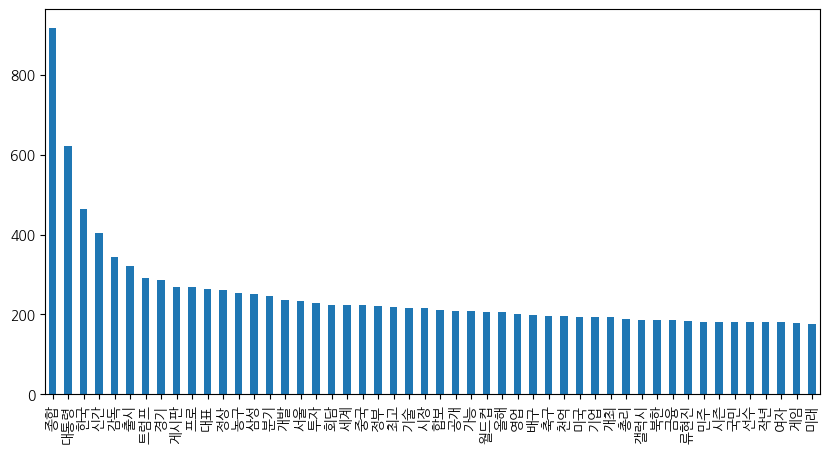

In [15]:
plt.figure(figsize=(10,5))
# plt.title('TF-IDF 가중치 합')
df_x_vect.sum().nlargest(50).plot.bar()
plt.show()

* LDA(LatentDirichletAllocation) 토픽모델링

In [17]:
from sklearn.decomposition import LatentDirichletAllocation
# 토픽수
n_components=4
LDA_model = LatentDirichletAllocation(n_components=n_components, random_state=2024)
# 문서내의 주제분포
W = LDA_model.fit_transform(df_x_vect)

In [18]:
W

array([[0.04196209, 0.61723779, 0.29822221, 0.04257791],
       [0.08333492, 0.74393696, 0.08596455, 0.08676357],
       [0.05192755, 0.28311554, 0.05453995, 0.61041696],
       ...,
       [0.07034957, 0.80388674, 0.06326355, 0.06250014],
       [0.03716086, 0.035891  , 0.03605131, 0.89089683],
       [0.89221548, 0.03635478, 0.03571512, 0.03571462]])

In [19]:
# 주제내의 문단어분포
H = LDA_model.components_
H

array([[  0.25255927,   0.84240498,   0.25732883, ...,  17.3191645 ,
         38.18464383,   0.25434633],
       [125.2416242 ,   0.25130176,   0.2540349 , ...,  19.15624549,
          0.25561379,   0.2526818 ],
       [  0.25365533,  35.64459892,  40.23762507, ...,  23.53899808,
          0.27444351,  19.81639842],
       [  0.25216121,   0.26169434,   0.2510112 , ...,  29.98559193,
          0.28529887, 130.67657344]])

In [20]:
W.shape, H.shape

((45673, 4), (4, 2000))

In [21]:
df_lda_W = pd.DataFrame(W)
df_lda_W['title2'] = df['title2']
df_lda_W['label2'] = df['label']
df_lda_W.head(10).style.background_gradient()

,0,1,2,3,title2,label2
0,0.041962,0.617238,0.298222,0.042578,유튜브 내달 일 크리에이터 지원 공간 운영,생활문화
1,0.083335,0.743937,0.085965,0.086764,어버이날 맑 남부 지방 옅 황사,생활문화
2,0.051928,0.283116,0.054540,0.610417,내년 국가 평가 때 논문 건수 반영 않,사회
3,0.062538,0.062502,0.062741,0.812219,김명자 신임 과 회장 원로 젊 과학자 지혜 것,사회
4,0.050148,0.050001,0.612247,0.287604,회색 인간 작가 김동식 양 심 백 등 소설 집 출간,생활문화
5,0.062750,0.552108,0.062554,0.322588,야외 방송 액션 캠 전용 요금제,IT과학
6,0.087480,0.730084,0.090635,0.091801,월드컵 태극전사 강 초기 레오강 입 종합,스포츠
7,0.083335,0.749952,0.083378,0.083334,미세먼지 속 출근길,생활문화
8,0.227724,0.041859,0.042051,0.688367,왓츠 앱 원 레바논 민심 총리 사퇴 종 합보,세계
9,0.285026,0.363244,0.042690,0.309040,베트남 경제 고성장 지속 분기 성장,세계


In [82]:
df_lda_topic = pd.DataFrame(H, columns=tfidfvect.get_feature_names_out())
df_lda_topic.style.background_gradient()

,가격,가결,가계,가구,가능,가동,가빈,가상,가속,가스,가을,가입,가입자,가족,가지,가짜,가치,간담회,간부,갈등,감독,감사,감소,감시,강경,강남,강력,강릉,강세,강원,강정호,강제,강조,강추위,강풍,강행,강화,개관,개국,개막,개막전,개발,개방,개사,개선,개설,개성,개소,개시,개월,개인,개입,개장,개정,개최,개통,개편,개헌,개헌안,개혁,갤럭시,거래,거래소,거론,거리,거부,거포,걱정,건강,건물,건설,검사,검색,검증,검찰,검토,게시판,게임,겨냥,겨울,격돌,격려,격차,격추,격파,격화,견제,결과,결국,결론,결산,결승,결의,결의안,결장,결정,결제,결합,경계,경고,경기,경기도,경남,경매,경보,경북


<Axes: >

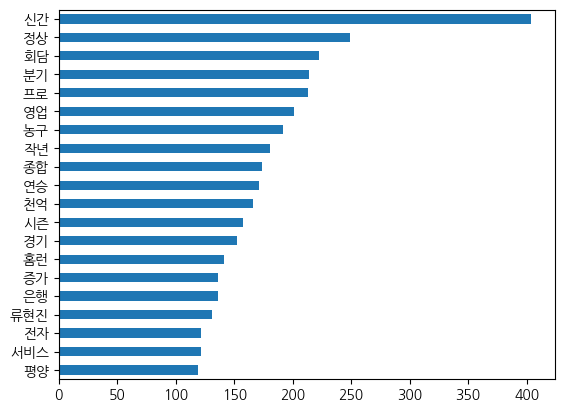

In [94]:
df_lda_topic.loc[0].nlargest(20).sort_values(ascending=True).plot.barh()

<Axes: >

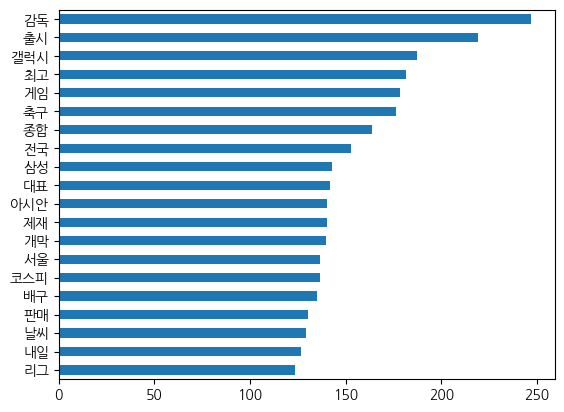

In [95]:
df_lda_topic.loc[1].nlargest(20).sort_values(ascending=True).plot.barh()

<Axes: >

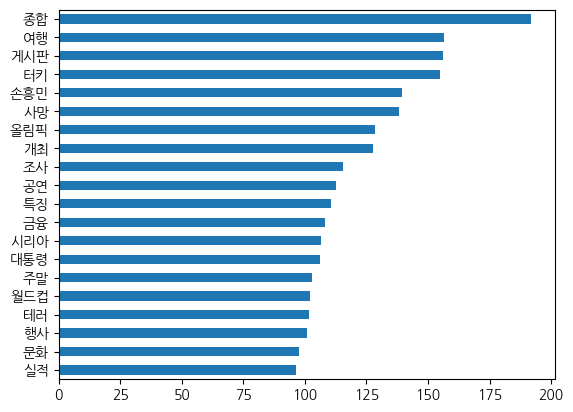

In [96]:
df_lda_topic.loc[2].nlargest(20).sort_values(ascending=True).plot.barh()

<Axes: >

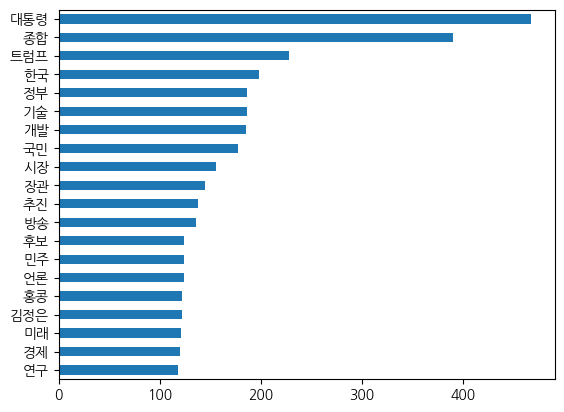

In [97]:
df_lda_topic.loc[3].nlargest(20).sort_values(ascending=True).plot.barh()